In [1]:
import visa
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib auto
import sounddevice as sd

class PlacaAudio:
    sampling_frequency=48000
    channels = 2
    def get_audio_and_plot_it(self,duration = 2):
        N = int(duration*self.sampling_frequency)   
        data_heard = sd.rec(N, samplerate=self.sampling_frequency, channels=2)
        sd.wait()
        t=np.arange(0,duration,1/self.sampling_frequency)
        plt.plot(t,data_heard)
        plt.show()
        return t, data_heard

    def generate_sine(self, frequency, duration,A=1):
        sample = self.sampling_frequency*duration/frequency
        x = np.arange(sample)
        sinArray = A*np.sin(2*np.pi*frequency*x/self.sampling_frequency)
        return sinArray
    
    def generate_ramp(self, frequency, duration):
        sample = self.sampling_frequency*duration/frequency
        x = np.arange(10*sample)
        return x/self.sampling_frequency
    
    def play(self, data):
        sd.play(data, self.sampling_frequency)
    def create_random_sound(self, duration):
        arrayRandom = [random.uniform(-10,10) for i in np.arange(0, self.sampling_frequency*duration)]
        return np.asarray(arrayRandom)
    def stop(self):
        sd.stop()
    def set_samplerate(self, sampling_frequency):
        self.sampling_frequency = sampling_frequency
        
        
    def record_sound(self, duration):
        myrecording = sd.rec(duration * self.sampling_frequency, samplerate=self.sampling_frequency, channels=self.channels)
        return myrecording
    
    
    def record_and_play(self, data):
        myrecording = sd.playrec(data, self.samplerate, self.channels)
        return myrecording
    def sine_gen_and_rec(self,duration,frequency,A):
        sample = self.sampling_frequency*duration/frequency
        x = np.arange(sample)
        sinArray = A*np.sin(2*np.pi*frequency*x/self.sampling_frequency)
        myrecording = sd.playrec(sinArray, self.sampling_frequency,  channels=1,blocking=True)
        return myrecording
            
    def get_audio_tf_and_plot_it(self,duration = 2):
        N = int(duration*self.sampling_frequency)
        data_heard = sd.rec(N, samplerate=self.sampling_frequency, channels=2)
        sd.wait()
        X0 = np.fft.fftshift(np.fft.fft(data_heard[:,0])/N)
        X1 = np.fft.fftshift(np.fft.fft(data_heard[:,1])/N)
        T=1/self.sampling_frequency
        f = np.arange(-1/(2*T),1/(2*T),1/(N*T))
        plt.plot(f,np.abs(X0))
        plt.show()
        

Using matplotlib backend: Qt5Agg


In [2]:

creemo = PlacaAudio()


In [3]:
duration=1
frequency=10
A=1
sample = creemo.sampling_frequency*duration/frequency
x = np.arange(sample)
sinArray = A*np.sin(2*np.pi*frequency*x/creemo.sampling_frequency)
myrecording = sd.playrec(sinArray, channels=1,blocking=True)

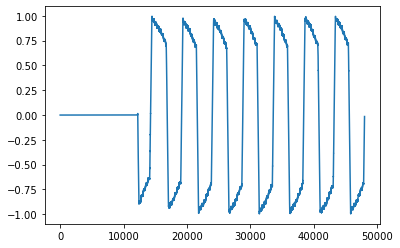

In [7]:
plt.plot(x,myrecording)

In [ ]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
sd.default.samplerate=4*11025
sd.default.latency = ['high','high']

def Senoidal(Offs,Ampl,Freq,nPeriods):
    n=nPeriods
    SR = sd.default.samplerate
    t = np.linspace(0,n*np.divide(1,Freq),n*int(np.divide(SR,Freq)),endpoint=False) # valores de tiempo que van a ser barridos.
    return t,np.divide(Ampl*np.sin(2*np.pi*Freq*t)+Offs,1.6)

Freq = 1000
t,y=Senoidal(0,.25,Freq,300)


myrecording = sd.playrec(y, channels=2,blocking=True)

ch1=np.asarray([i[0] for i in myrecording])
#ch2=np.asarray([i[1] for i in myrecording])
tiempo = np.divide(np.arange(len(ch1)),sd.default.samplerate)
z=np.divide(y,2)
plt.plot(tiempo,z,'-')
plt.plot(tiempo,ch1,'.')
#plt.plot(tiempo,ch2,'.')
plt.xlim(0.2,0.205)

In [ ]:
myrecording

In [ ]:
data = creemo.generate_sine(100,500,0.5)
creemo.play(data)
2*0.5*1.25

In [ ]:
sd.query_devices()

In [ ]:
np.savetxt('.txt', data)
np.savetxt('.txt', t)

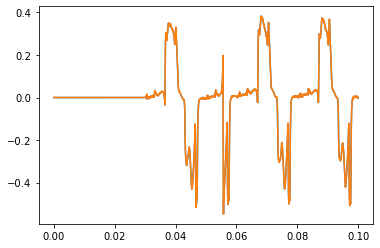

In [18]:
escuchemo = PlacaAudio()
t, data = escuchemo.get_audio_and_plot_it(0.1)

In [ ]:
np.shape(data)

In [ ]:
data

In [ ]:
a = [row[0] for row in data]
b = [row[1] for row in data]
np.savetxt('a.txt',a)
np.savetxt('b.txt',b)

In [ ]:
plt.plot(a,b,'*')

In [ ]:
%matplotlib inline
plt.plot(t,2.17*data)
2*np.max(data[50:])

In [ ]:
data = creemo.generate_ramp(100,50)
creemo.play(z)

In [ ]:
data

In [ ]:
ampEnv = [4.12, 3.08, 2.08, 1.02, 0.52, 1.53, 2.59, 3.6, 4.62, 5.14, 5.88, 4.36, 4.44]
ampMed = [1.89, 1.43, 0.95, 0.48, 0.24, 0.71, 1.19, 1.66, 1.95, 1.95, 1.95, 1.97, 1.94]
plt.scatter(ampEnv,ampMed)

In [ ]:
from scipy import signal as sg
f=10 #frecuencia de la señal a emitirriang
N=50 #número de puntos por período
n=30 #número de períodos
A=1

t = np.linspace(0,n*np.divide(1,f),n*N,endpoint=False) # valores de tiempo que van a ser barridos.
z=A*sg.sawtooth(2*np.pi*t)

In [ ]:
plt.plot(t,z)

In [ ]:
n*np.divide(1,f)

In [ ]:
creemo.play(z)

In [ ]:
t = np.linspace(0, 1000, 500000)
z=1+sg.sawtooth(2 * np.pi * 5 * t)                
plt.plot(t[1:500], z[1:500])

In [ ]:
plt.plot(t, 1+ sg.sawtooth(2 * np.pi * 0.01 * t))

In [ ]:
#MEDICIONES FREC VS FREC, AMP VS FREC COMO OSCILOSCOPIO

In [ ]:
Frecsbis = [0.5,  0.3, 0.4, 1,  100, 500, 1000, 2000, 5000, 10000, 15000, 18000, 19000, 19500, 20000]
Frecs2 = [0.4999, 0.300000, 0.40040, 9.9997, 99.99710, 500, 1000, 2000, 5000.6, 9999.7, 15000, 18000, 19003, 19496, 20006]
Amplitudes = [0.1998,  0.1294, 0.5348, 0.9886, 0.9941, 0.9926, 0.9902, 0.9832, 0.9806, 0.9788, 0.9917, 0.7693 ,0.6214,0.5302,0.4231]

In [ ]:
Amp = np.zeros(len(Amplitudes))
log = np.zeros(len(Amplitudes))
for i in range(len(Amplitudes)):
    Amp[i] = 2*2.179*Amplitudes[i]
    log[i] = 20*np.log(Amp[i]/4) 

In [ ]:
plt.scatter(Frecs2,log)

In [ ]:
Amp